# Gradient Descent

### Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### Data

In [2]:
x  = [0.8, 1.2]
w_init = [0, 0]
ytrue = 5
learning_rate = 0.2
Niter = 50

#%% ----------------------------------------------
x  = np.expand_dims(np.array(x), axis=1)
w_init = np.expand_dims(np.array(w_init), axis=1)
#%% ----------------------------------------------

### Classes

In [3]:
class F:
    def __init__(self, w):
        self.w = w
    
    def val(self, x):
        return np.matmul(self.w.T, x).ravel()
    
    def grad_w(self, x):
        return x 
    
#----------------------------
flag_test_F = False
if flag_test_F:
    fx = F(w_init)
    print( fx.val(x) )
    print( fx.grad_w(x) )

In [4]:
class MSE:
    def __init__(self, F):
        self.F = F
    
    def val(self, x, ytrue):
        return 0.5*( ytrue-self.F.val(x) )**2
        
    def grad_w(self, x, ytrue):
        yhat = self.F.val(x)
        return (ytrue-yhat)*(-1)*self.F.grad_w(x)

#----------------------------
flag_test_MSE = False
if flag_test_MSE:
    fx = F(w_init)
    L = MSE(fx)
    print( L.val(x, ytrue) )
    print( -L.grad_w(x, ytrue))

In [5]:
class GradientDescent:
    def __init__(self, loss, lr = 0.1, Niter = 10):
        self.loss = loss
        self.lr = lr
        self.Niter = Niter
        
    def update(self,x,ytrue):
        self.loss.F.w = self.loss.F.w - ( self.lr * self.loss.grad_w(x,ytrue) )
        
    def fit(self,x,ytrue):
        steps = [self.loss.F.w]
        for k in range(self.Niter):            
            self.update(x,ytrue)
            steps.append(self.loss.F.w)
        return steps

### Running

In [6]:
flag_test_GradientDescent = True
if flag_test_GradientDescent:
    fx = F(w_init)
    L = MSE(fx)
    GD = GradientDescent(L, lr=learning_rate, Niter=Niter)
    steps = GD.fit(x,ytrue)
    print('w_star = \n',steps[-1])
    print('y_hat = %.3f'%(fx.val(x)))
    print('perdida = ',L.val(x,ytrue))
    print('error = %.5f'%(ytrue-fx.val(x)) )

w_star = 
 [[1.92307692]
 [2.88461538]]
y_hat = 5.000
perdida =  [5.47251904e-23]
error = 0.00000


### Plots

In [7]:
#---------------- Make data
Ns = 20
bounds = 6
rangeW0 = np.linspace(-bounds/10, bounds, Ns)
rangeW1 = np.linspace(-bounds/10, bounds, Ns)
[WW0, WW1] = np.meshgrid(rangeW0, rangeW1)
WW0 = np.expand_dims(WW0.ravel(), axis=0)
WW1 = np.expand_dims(WW1.ravel(), axis=0)
WW = np.vstack((WW0,WW1))

fun = F(w_init)
L = MSE(fun)
L_values = np.zeros(WW.shape[1])
for kc in range(WW.shape[1]):
    w_try = WW[:,kc]
    fun.w = w_try
    L_values[kc] = L.val(x,ytrue)

L_values = L_values.reshape(Ns,Ns)

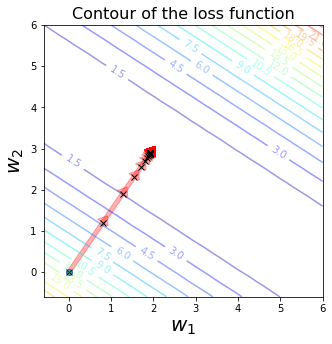

In [8]:
#---------------- Make plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
contours = ax.contour(rangeW0, rangeW1, L_values, 20, cmap='jet', alpha=0.4)
ax.clabel(contours)
ax.set_xlabel('$w_1$', fontsize=20)
ax.set_ylabel('$w_2$', fontsize=20)
ax.set_title('Contour of the loss function', fontsize=16)
#ax.set_title('Contorno de la función de pérdida', fontsize=16)
#---------------------------------------------
ax.plot(w_init[0],w_init[1],'o')
for ks, w_step in enumerate(steps):
    w_step = w_step.ravel()
    ax.plot(w_step[0],w_step[1],'kx')
    if ks < len(steps)-1:
        w_next = steps[ks+1].ravel()
        ax.arrow(w_step[0],w_step[1],
                 w_next[0]-w_step[0], w_next[1]-w_step[1],
                 width=.1, head_length=.2, alpha=0.3, color='r' )
plt.show()